## Visualizing Germany energy consumption data in Python

- We work on the [JERICHO-E-usage dataset](https://springernature.figshare.com/collections/Time_series_of_useful_energy_consumption_patterns_for_energy_system_modeling/5245457).
- The dataset is from the following paper:

> Priesmann, J., Nolting, L., Kockel, C., & Praktiknjo, A. (2021). Time series of useful energy consumption patterns for energy system modeling. Scientific Data, 8(1), 1-12.


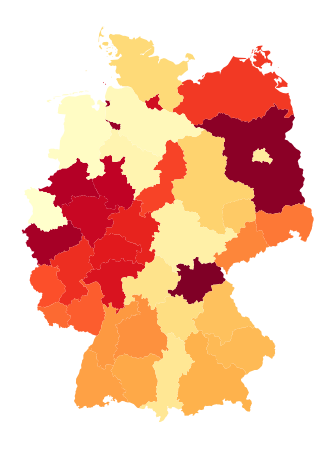

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (14, 8))
ax = fig.subplots(1)
shape = gpd.read_file("NUTS_RG_03M_2016_4326.shp")
shape_de = shape[(shape['CNTR_CODE'] == 'DE') & (shape['LEVL_CODE'] == 2)]
shape_de.plot(cmap = 'YlOrRd_r', ax = ax)
plt.xticks([])
plt.yticks([])
for _, spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

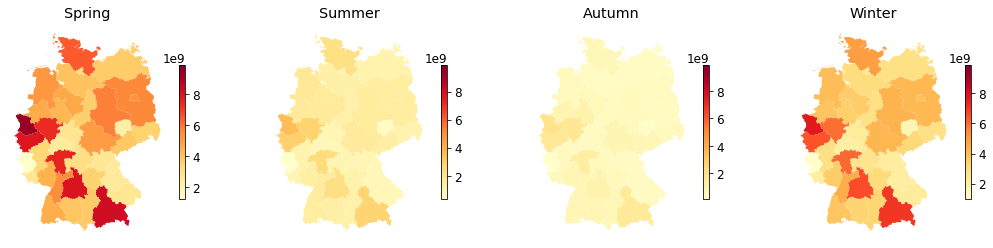

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Upload shapefile
shape = gpd.read_file("NUTS_RG_03M_2016_4326.shp")
shape_de = shape[(shape['CNTR_CODE'] == 'DE') & (shape['LEVL_CODE'] == 2)]

# Upload energy data
data = pd.read_csv('nuts2_hourly_res_Space Heat_kw.csv', index_col = 0)
mat = data.values.T # (region, time step)

plt.rcParams['font.size'] = 12
fig = plt.figure(figsize = (18, 4))
season = np.array([0, 90, 181, 273, 365])
for t in range(4):
    df = pd.DataFrame({'NUTS_ID': list(data.columns), 'total': 
                       np.sum(mat[:, season[t] * 24 : season[t + 1] * 24], axis = 1).reshape(-1)})
    merged = shape_de.set_index('NUTS_ID').join(df.set_index('NUTS_ID'))
    merged = merged.reset_index()
    
    ax = fig.add_subplot(1, 4, t + 1)
    merged.plot('total', cmap = 'YlOrRd', legend = True, vmax = 9.9e9,
                legend_kwds = {'shrink': 0.618}, ax = ax)
    plt.xticks([])
    plt.yticks([])
    
    if t == 0:
        plt.title('Spring')
    elif t == 1:
        plt.title('Summer')
    elif t == 2:
        plt.title('Autumn')
    elif t == 3:
        plt.title('Winter')
    for _, spine in ax.spines.items():
        spine.set_visible(False)
plt.show()

### License

<div class="alert alert-block alert-danger">
<b>This work is released under the MIT license.</b>
</div>